In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", size=14)
%matplotlib inline
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
# Read in csv medical data
mdf= pd.read_csv('/Users/robertpatton/Desktop/Desktop - Robert’s MacBook Pro/D208 /medical_clean.csv')

In [3]:
#Examine data info
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [4]:
#Check for duplicates
mdf.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [5]:
#Check for missing values
mdf.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [6]:
#Drop variables not needed for regression model
mdf=mdf.drop(['CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip','Lat','Lng','Population','Area','TimeZone','Job','Marital','Full_meals_eaten','Soft_drink','Services','TotalCharge','Additional_charges','Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8'], axis=1)

In [7]:
#Confirm variables dropped
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Children            10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Income              10000 non-null  float64
 3   Gender              10000 non-null  object 
 4   ReAdmis             10000 non-null  object 
 5   VitD_levels         10000 non-null  float64
 6   Doc_visits          10000 non-null  int64  
 7   vitD_supp           10000 non-null  int64  
 8   Initial_admin       10000 non-null  object 
 9   HighBlood           10000 non-null  object 
 10  Stroke              10000 non-null  object 
 11  Complication_risk   10000 non-null  object 
 12  Overweight          10000 non-null  object 
 13  Arthritis           10000 non-null  object 
 14  Diabetes            10000 non-null  object 
 15  Hyperlipidemia      10000 non-null  object 
 16  BackP

In [8]:
#Get value counts for initial_admin
mdf.Gender.value_counts(),mdf.ReAdmis.value_counts(),mdf.Initial_admin.value_counts(), mdf.HighBlood.value_counts(), mdf.Stroke.value_counts(), mdf.Complication_risk.value_counts(),mdf.Overweight.value_counts(),mdf.Arthritis.value_counts(),mdf.Diabetes.value_counts(), mdf.Hyperlipidemia.value_counts(), mdf.BackPain.value_counts(), mdf.Anxiety.value_counts(), mdf.Allergic_rhinitis.value_counts(), mdf.Reflux_esophagitis.value_counts(), mdf.Asthma.value_counts()

(Female       5018
 Male         4768
 Nonbinary     214
 Name: Gender, dtype: int64,
 No     6331
 Yes    3669
 Name: ReAdmis, dtype: int64,
 Emergency Admission      5060
 Elective Admission       2504
 Observation Admission    2436
 Name: Initial_admin, dtype: int64,
 No     5910
 Yes    4090
 Name: HighBlood, dtype: int64,
 No     8007
 Yes    1993
 Name: Stroke, dtype: int64,
 Medium    4517
 High      3358
 Low       2125
 Name: Complication_risk, dtype: int64,
 Yes    7094
 No     2906
 Name: Overweight, dtype: int64,
 No     6426
 Yes    3574
 Name: Arthritis, dtype: int64,
 No     7262
 Yes    2738
 Name: Diabetes, dtype: int64,
 No     6628
 Yes    3372
 Name: Hyperlipidemia, dtype: int64,
 No     5886
 Yes    4114
 Name: BackPain, dtype: int64,
 No     6785
 Yes    3215
 Name: Anxiety, dtype: int64,
 No     6059
 Yes    3941
 Name: Allergic_rhinitis, dtype: int64,
 No     5865
 Yes    4135
 Name: Reflux_esophagitis, dtype: int64,
 No     7107
 Yes    2893
 Name: Asthma, dtyp

In [9]:
#Examine data values
mdf.head()

,Children,Age,Income,Gender,ReAdmis,VitD_levels,Doc_visits,vitD_supp,Initial_admin,HighBlood,...,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days
0,1,53,86575.93,Male,No,19.141466,6,0,Emergency Admission,Yes,...,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,10.585770
1,3,51,46805.99,Female,No,18.940352,4,1,Emergency Admission,Yes,...,Yes,No,No,No,No,No,No,Yes,No,15.129562
2,3,53,14370.14,Female,No,18.057507,4,0,Elective Admission,Yes,...,Yes,No,Yes,No,No,No,No,No,No,4.772177
3,0,78,39741.49,Male,No,16.576858,4,0,Elective Admission,No,...,No,Yes,No,No,No,No,No,Yes,Yes,1.714879
4,1,22,1209.56,Female,No,17.439069,5,2,Elective Admission,No,...,No,No,No,Yes,No,No,Yes,No,No,1.254807


In [10]:
#Create a list of binary columns
Binary_columns= ['HighBlood', 'Stroke', 'Overweight','ReAdmis', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']

In [11]:
#Replace binary columns yes/no with 0/1
mdf[Binary_columns]=mdf[Binary_columns].replace({'Yes': 1, 'No': 0})

In [12]:
#Confirm replace function successful
print(mdf)

      Children  Age    Income  Gender  ReAdmis  VitD_levels  Doc_visits  \
0            1   53  86575.93    Male        0    19.141466           6   
1            3   51  46805.99  Female        0    18.940352           4   
2            3   53  14370.14  Female        0    18.057507           4   
3            0   78  39741.49    Male        0    16.576858           4   
4            1   22   1209.56  Female        0    17.439069           5   
...        ...  ...       ...     ...      ...          ...         ...   
9995         2   25  45967.61    Male        0    16.980860           4   
9996         4   87  14983.02    Male        1    18.177020           5   
9997         3   45  65917.81  Female        1    17.129070           4   
9998         3   43  29702.32    Male        1    19.910430           5   
9999         8   70  62682.63  Female        1    18.388620           5   

      vitD_supp          Initial_admin  HighBlood  ...  Overweight Arthritis  \
0             0    

In [13]:
#Move ReAdmis variable to first position
first_column=mdf.pop('ReAdmis')
mdf.insert(0, 'ReAdmis', first_column)
display(mdf)

,ReAdmis,Children,Age,Income,Gender,VitD_levels,Doc_visits,vitD_supp,Initial_admin,HighBlood,...,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days
0,0,1,53,86575.93,Male,19.141466,6,0,Emergency Admission,1,...,0,1,1,0,1,1,1,0,1,10.585770
1,0,3,51,46805.99,Female,18.940352,4,1,Emergency Admission,1,...,1,0,0,0,0,0,0,1,0,15.129562
2,0,3,53,14370.14,Female,18.057507,4,0,Elective Admission,1,...,1,0,1,0,0,0,0,0,0,4.772177
3,0,0,78,39741.49,Male,16.576858,4,0,Elective Admission,0,...,0,1,0,0,0,0,0,1,1,1.714879
4,0,1,22,1209.56,Female,17.439069,5,2,Elective Admission,0,...,0,0,0,1,0,0,1,0,0,1.254807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,2,25,45967.61,Male,16.980860,4,1,Emergency Admission,1,...,0,0,0,0,0,1,0,1,0,51.561220
9996,1,4,87,14983.02,Male,18.177020,5,0,Elective Admission,1,...,1,1,1,0,0,0,0,0,1,68.668240
9997,1,3,45,65917.81,Female,17.129070,4,0,Elective Admission,1,...,1,0,0,0,0,1,1,0,0,70.154180
9998,1,3,43,29702.32,Male,19.910430,5,1,Emergency Admission,0,...,1,0,0,0,1,0,0,0,0,63.356900


In [14]:
#Re-express Initial_admin, complication risk, and Gender columns to numerical values and use one-hot encoding
mdf=pd.get_dummies(mdf, columns=['Initial_admin'],prefix="", drop_first=True)
mdf=pd.get_dummies(mdf, columns=['Complication_risk'], prefix="Risk", drop_first=True)
mdf=pd.get_dummies(mdf, columns=['Gender'], prefix="", drop_first=True)
mdf.head()

,ReAdmis,Children,Age,Income,VitD_levels,Doc_visits,vitD_supp,HighBlood,Stroke,Overweight,...,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,_Emergency Admission,_Observation Admission,Risk_Low,Risk_Medium,_Male,_Nonbinary
0,0,1,53,86575.93,19.141466,6,0,1,0,0,...,1,0,1,10.585770,1,0,0,1,1,0
1,0,3,51,46805.99,18.940352,4,1,1,0,1,...,0,1,0,15.129562,1,0,0,0,0,0
2,0,3,53,14370.14,18.057507,4,0,1,0,1,...,0,0,0,4.772177,0,0,0,1,0,0
3,0,0,78,39741.49,16.576858,4,0,0,1,0,...,0,1,1,1.714879,0,0,0,1,1,0
4,0,1,22,1209.56,17.439069,5,2,0,0,0,...,1,0,0,1.254807,0,0,1,0,0,0


In [15]:
#Re-examine datframe info
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ReAdmis                 10000 non-null  int64  
 1   Children                10000 non-null  int64  
 2   Age                     10000 non-null  int64  
 3   Income                  10000 non-null  float64
 4   VitD_levels             10000 non-null  float64
 5   Doc_visits              10000 non-null  int64  
 6   vitD_supp               10000 non-null  int64  
 7   HighBlood               10000 non-null  int64  
 8   Stroke                  10000 non-null  int64  
 9   Overweight              10000 non-null  int64  
 10  Arthritis               10000 non-null  int64  
 11  Diabetes                10000 non-null  int64  
 12  Hyperlipidemia          10000 non-null  int64  
 13  BackPain                10000 non-null  int64  
 14  Anxiety                 10000 non-null 

In [16]:
#Get summary statistics
print(mdf.describe())

            ReAdmis      Children           Age         Income   VitD_levels  \
count  10000.000000  10000.000000  10000.000000   10000.000000  10000.000000   
mean       0.366900      2.097200     53.511700   40490.495160     17.964262   
std        0.481983      2.163659     20.638538   28521.153293      2.017231   
min        0.000000      0.000000     18.000000     154.080000      9.806483   
25%        0.000000      0.000000     36.000000   19598.775000     16.626439   
50%        0.000000      1.000000     53.000000   33768.420000     17.951122   
75%        1.000000      3.000000     71.000000   54296.402500     19.347963   
max        1.000000     10.000000     89.000000  207249.100000     26.394449   

         Doc_visits     vitD_supp     HighBlood        Stroke    Overweight  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       5.012200      0.398900      0.409000      0.199300      0.709400   
std        1.045734      0.628505      0.4

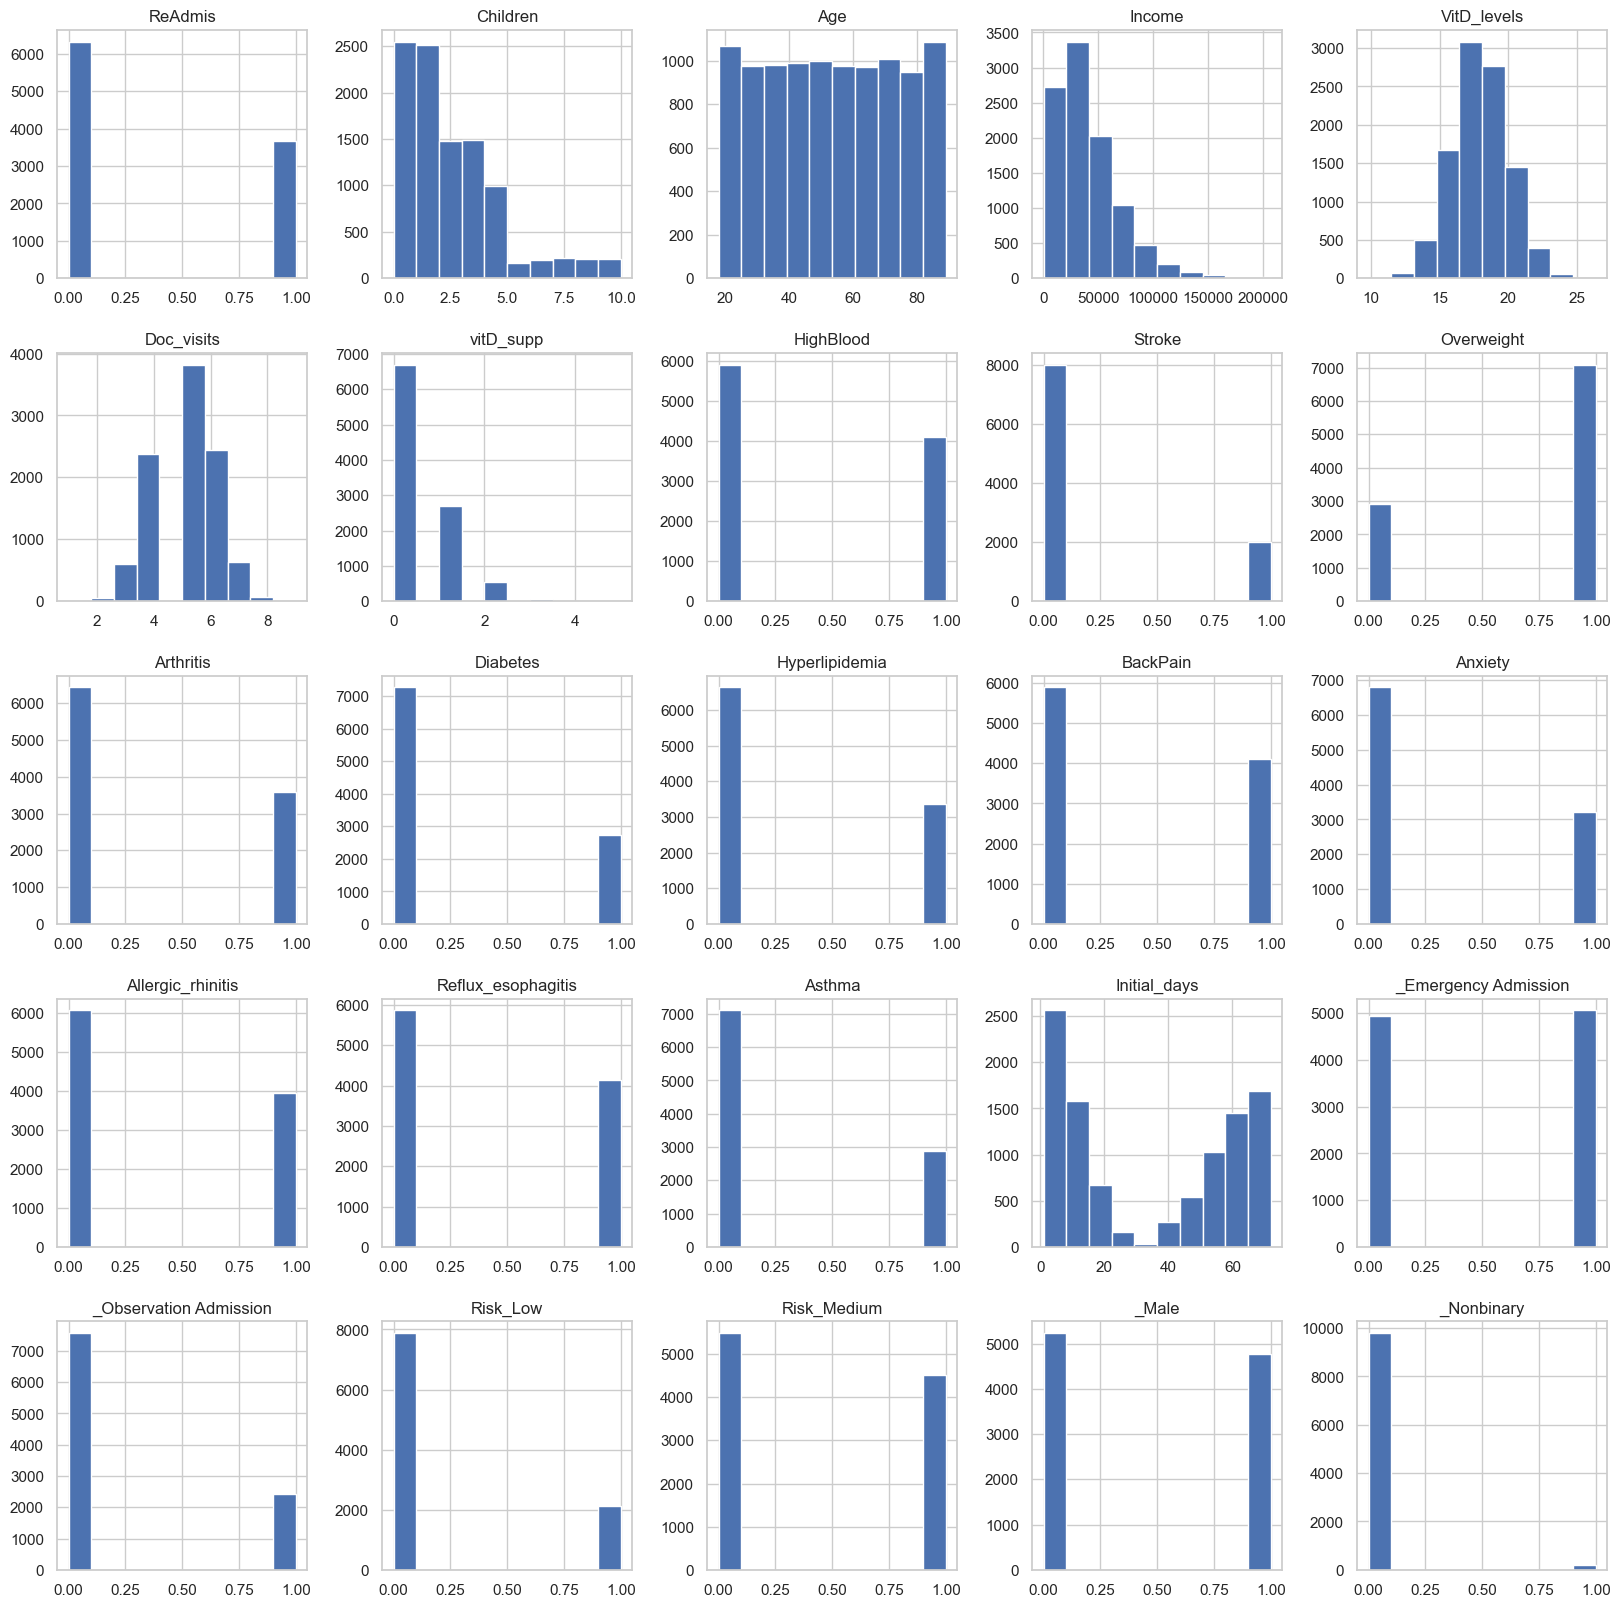

In [17]:
#Examine univariate distribution of variables
mdf.hist(figsize=(20,20))
plt.show()

In [18]:
#Gather numerical values for input into a boxplot
mdf_num_data=mdf.select_dtypes(include=[np.number])
mdf_num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ReAdmis                 10000 non-null  int64  
 1   Children                10000 non-null  int64  
 2   Age                     10000 non-null  int64  
 3   Income                  10000 non-null  float64
 4   VitD_levels             10000 non-null  float64
 5   Doc_visits              10000 non-null  int64  
 6   vitD_supp               10000 non-null  int64  
 7   HighBlood               10000 non-null  int64  
 8   Stroke                  10000 non-null  int64  
 9   Overweight              10000 non-null  int64  
 10  Arthritis               10000 non-null  int64  
 11  Diabetes                10000 non-null  int64  
 12  Hyperlipidemia          10000 non-null  int64  
 13  BackPain                10000 non-null  int64  
 14  Anxiety                 10000 non-null 

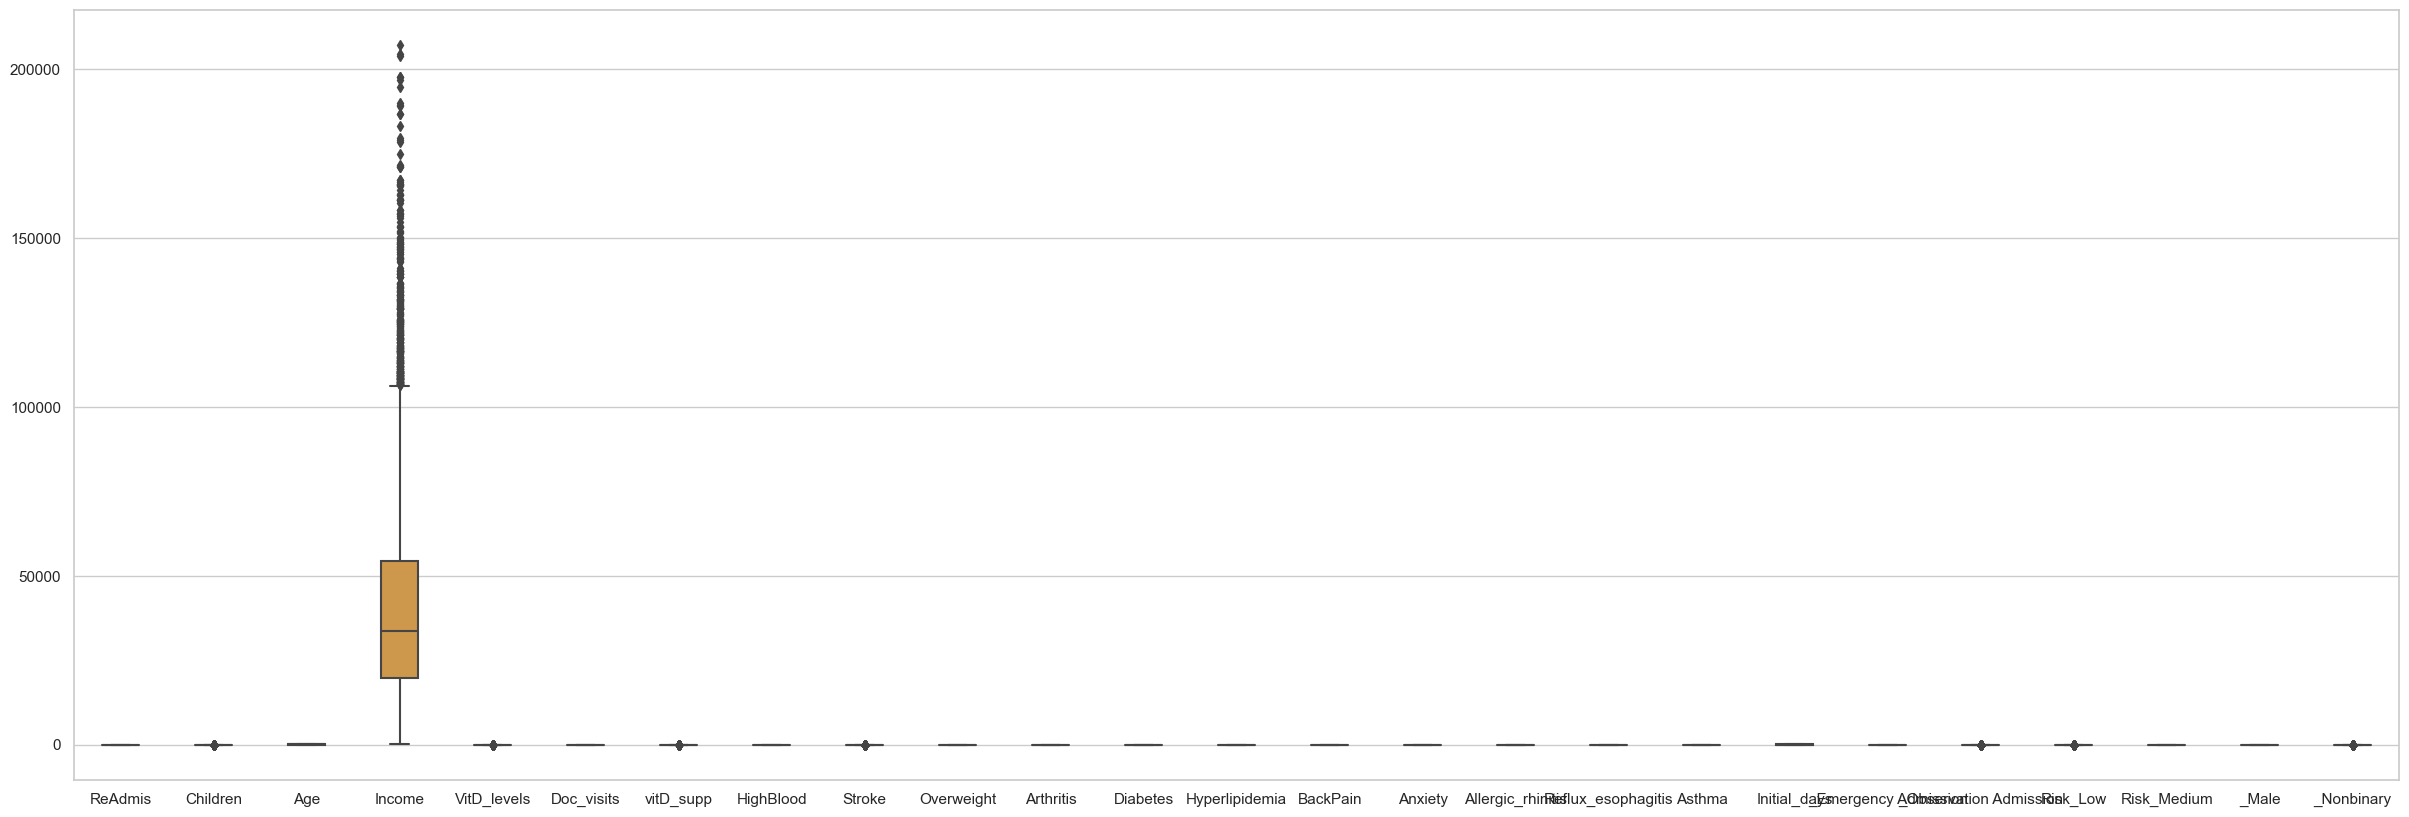

In [19]:
#use boxplot to find outliers in numerical data types
plt.subplots(figsize=(30,10))
boxplot=sns.boxplot(data=mdf_num_data, width=0.4)

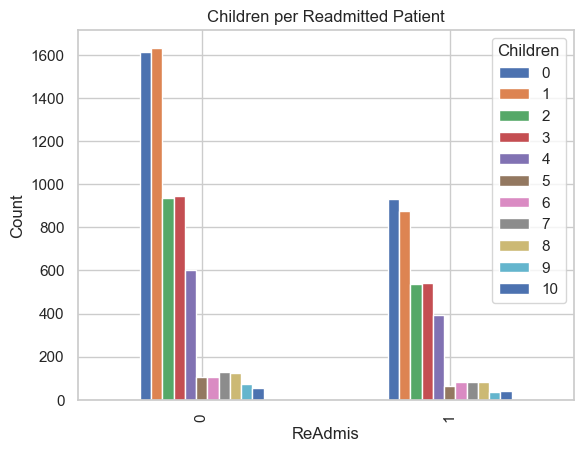

In [20]:
#Create bivariate relationships between predictor and independent variables
#Bar chart relationship for children 
crosstab= pd.crosstab(index=mdf['ReAdmis'], columns=mdf['Children'])
crosstab.plot(kind='bar')
plt.ylabel('Count')
plt.title('Children per Readmitted Patient')
plt.show()

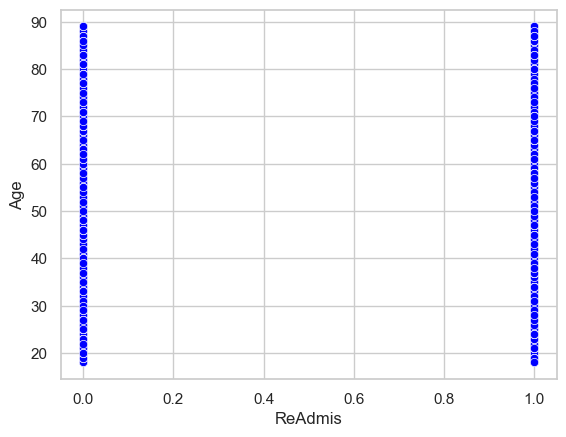

In [21]:
#Scatterplot bivariate relationship for age
sns.scatterplot(x=mdf['ReAdmis'], y=mdf['Age'], color='Blue')
plt.show();

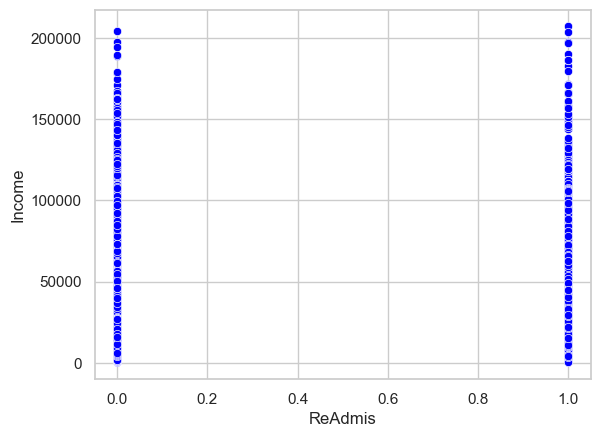

In [22]:
#Scatterplot bivariate relationship for Income
sns.scatterplot(x=mdf['ReAdmis'], y=mdf['Income'], color='Blue')
plt.show();

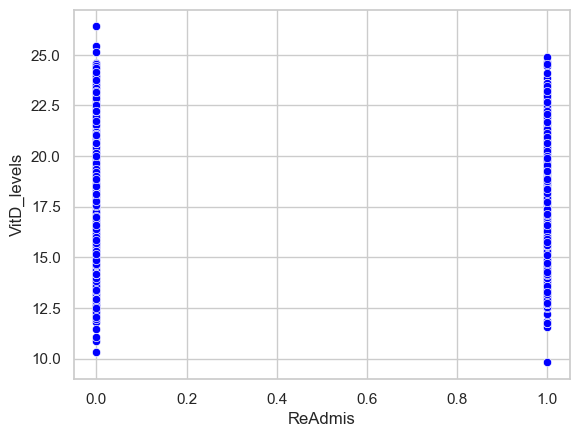

In [23]:
#Scatterplot bivariate relationship for VitD_levels
sns.scatterplot(x=mdf['ReAdmis'], y=mdf['VitD_levels'], color='Blue')
plt.show();

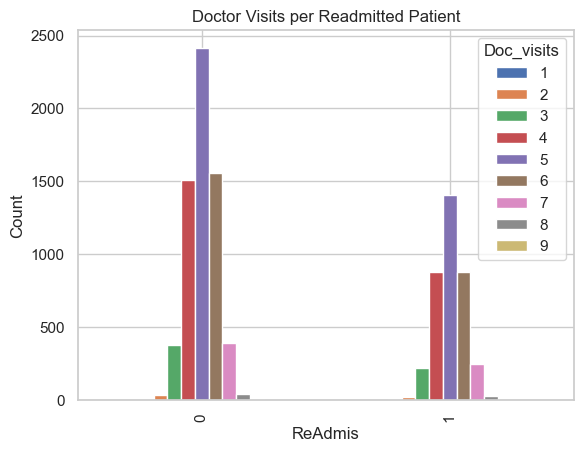

In [24]:
#Bar chart relationship for Doctors visits
crosstab= pd.crosstab(index=mdf['ReAdmis'], columns=mdf['Doc_visits'])
crosstab.plot(kind='bar')
plt.ylabel('Count')
plt.title('Doctor Visits per Readmitted Patient')
plt.show()

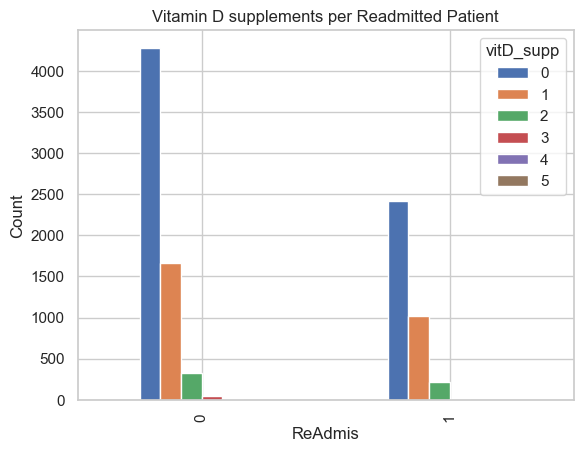

In [25]:
#Bar chart relationship for vitD supplements 
crosstab= pd.crosstab(index=mdf['ReAdmis'], columns=mdf['vitD_supp'])
crosstab.plot(kind='bar')
plt.ylabel('Count')
plt.title('Vitamin D supplements per Readmitted Patient')
plt.show()

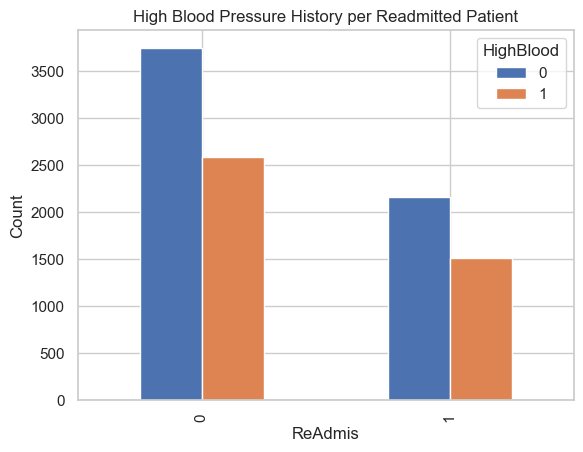

In [26]:
#Bar chart relationship for High Blood pressure
crosstab= pd.crosstab(index=mdf['ReAdmis'], columns=mdf['HighBlood'])
crosstab.plot(kind='bar')
plt.ylabel('Count')
plt.title('High Blood Pressure History per Readmitted Patient')
plt.show()

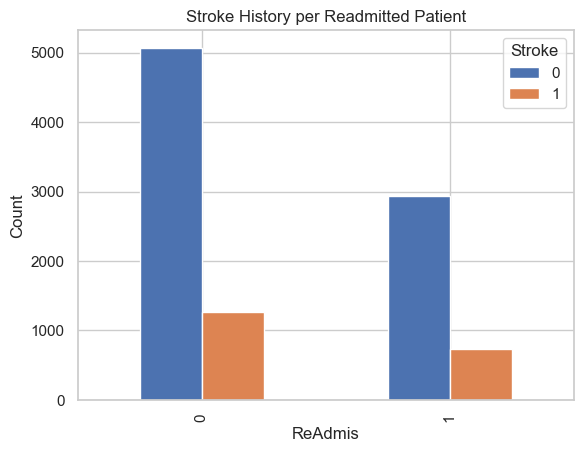

In [27]:
#Bar chart relationship for Stroke  
crosstab= pd.crosstab(index=mdf['ReAdmis'], columns=mdf['Stroke'])
crosstab.plot(kind='bar')
plt.ylabel('Count')
plt.title('Stroke History per Readmitted Patient')
plt.show()

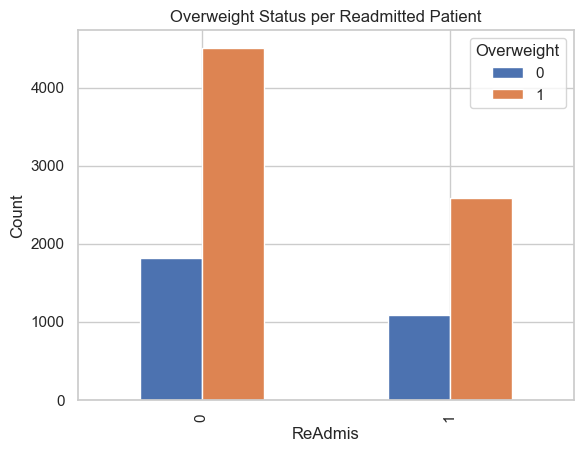

In [28]:
#Bar chart relationship for Overweight  
crosstab= pd.crosstab(index=mdf['ReAdmis'], columns=mdf['Overweight'])
crosstab.plot(kind='bar')
plt.ylabel('Count')
plt.title('Overweight Status per Readmitted Patient')
plt.show()

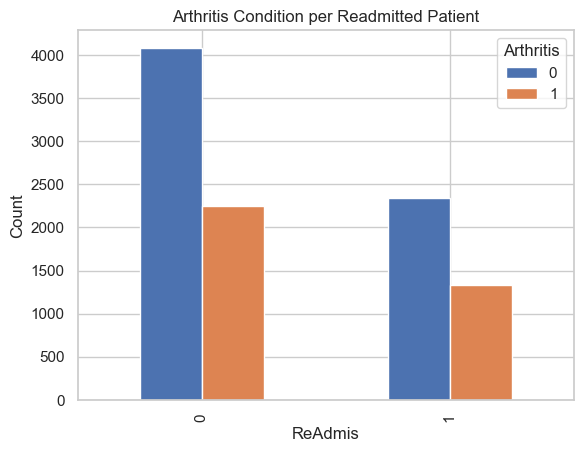

In [29]:
#Bar chart relationship for Arthritis  
crosstab= pd.crosstab(index=mdf['ReAdmis'], columns=mdf['Arthritis'])
crosstab.plot(kind='bar')
plt.ylabel('Count')
plt.title('Arthritis Condition per Readmitted Patient')
plt.show()

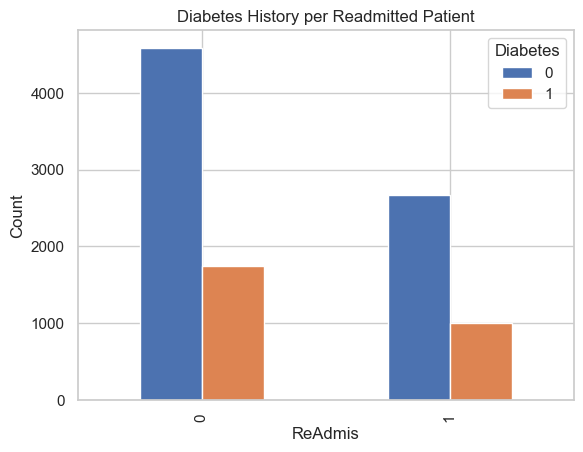

In [30]:
#Bar chart relationship for Diabetes  
crosstab= pd.crosstab(index=mdf['ReAdmis'], columns=mdf['Diabetes'])
crosstab.plot(kind='bar')
plt.ylabel('Count')
plt.title('Diabetes History per Readmitted Patient')
plt.show()

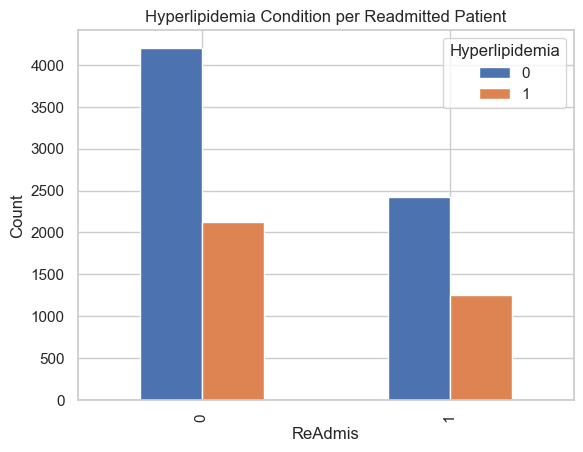

In [31]:
#Bar chart relationship for Hyperlipidemia  
crosstab= pd.crosstab(index=mdf['ReAdmis'], columns=mdf['Hyperlipidemia'])
crosstab.plot(kind='bar')
plt.ylabel('Count')
plt.title('Hyperlipidemia Condition per Readmitted Patient')
plt.show()

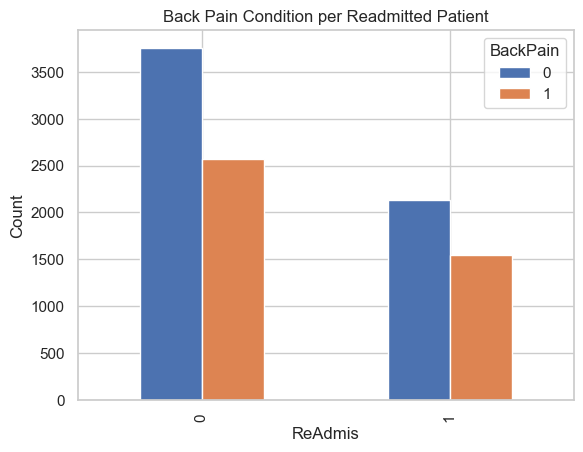

In [32]:
#Bar chart relationship for Back Pain  
crosstab= pd.crosstab(index=mdf['ReAdmis'], columns=mdf['BackPain'])
crosstab.plot(kind='bar')
plt.ylabel('Count')
plt.title('Back Pain Condition per Readmitted Patient')
plt.show()

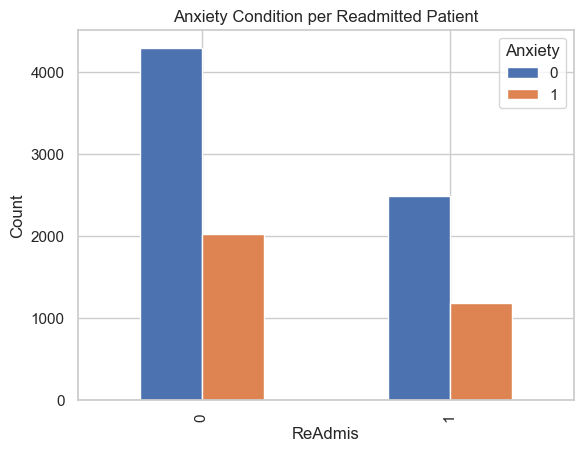

In [33]:
#Bar chart relationship for Anxiety
crosstab= pd.crosstab(index=mdf['ReAdmis'], columns=mdf['Anxiety'])
crosstab.plot(kind='bar')
plt.ylabel('Count')
plt.title('Anxiety Condition per Readmitted Patient')
plt.show()

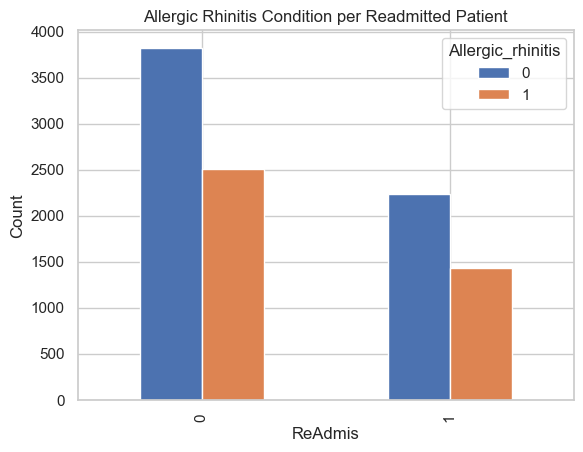

In [34]:
#Bar chart relationship for Allergic Rhinitis
crosstab= pd.crosstab(index=mdf['ReAdmis'], columns=mdf['Allergic_rhinitis'])
crosstab.plot(kind='bar')
plt.ylabel('Count')
plt.title('Allergic Rhinitis Condition per Readmitted Patient')
plt.show()

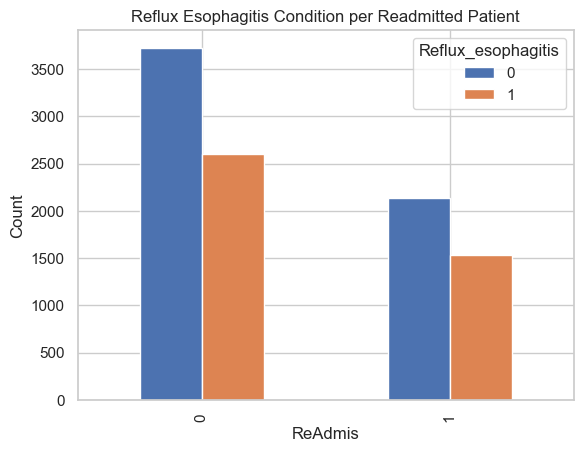

In [35]:
#Bar chart relationship for Reflux Esophagitis
crosstab= pd.crosstab(index=mdf['ReAdmis'], columns=mdf['Reflux_esophagitis'])
crosstab.plot(kind='bar')
plt.ylabel('Count')
plt.title('Reflux Esophagitis Condition per Readmitted Patient')
plt.show()

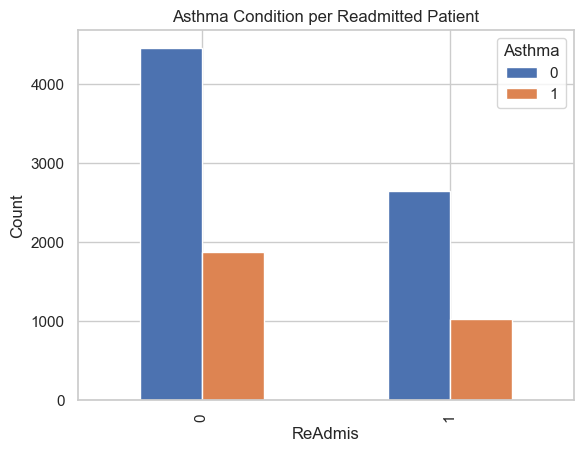

In [36]:
#Bar chart relationship for Asthma
crosstab= pd.crosstab(index=mdf['ReAdmis'], columns=mdf['Asthma'])
crosstab.plot(kind='bar')
plt.ylabel('Count')
plt.title('Asthma Condition per Readmitted Patient')
plt.show()

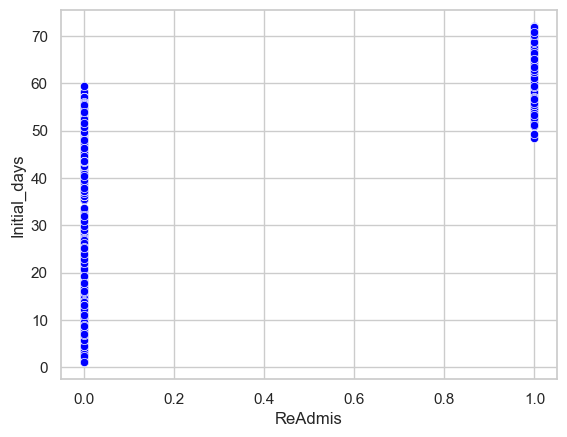

In [37]:
#Scatterplot bivariate relationship for initial days
sns.scatterplot(x=mdf['ReAdmis'], y=mdf['Initial_days'], color='Blue')
plt.show();

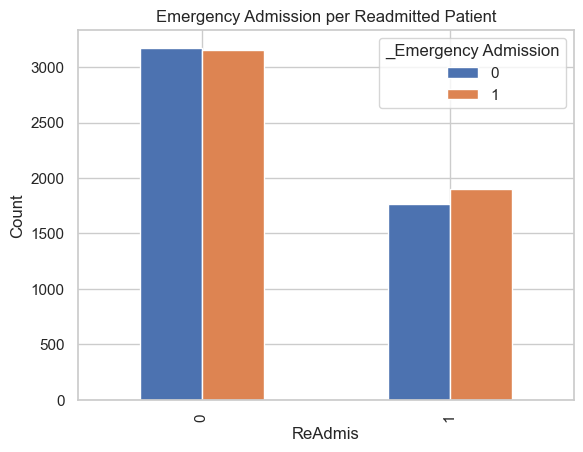

In [38]:
#Bar chart relationship for Initial admin emergency admission
crosstab= pd.crosstab(index=mdf['ReAdmis'], columns=mdf['_Emergency Admission'])
crosstab.plot(kind='bar')
plt.ylabel('Count')
plt.title('Emergency Admission per Readmitted Patient')
plt.show()

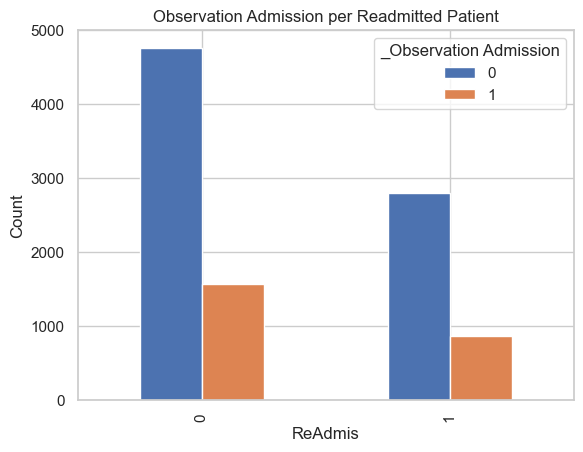

In [39]:
#Bar chart relationship for Initial admin observation
crosstab= pd.crosstab(index=mdf['ReAdmis'], columns=mdf['_Observation Admission'])
crosstab.plot(kind='bar')
plt.ylabel('Count')
plt.title('Observation Admission per Readmitted Patient')
plt.show()

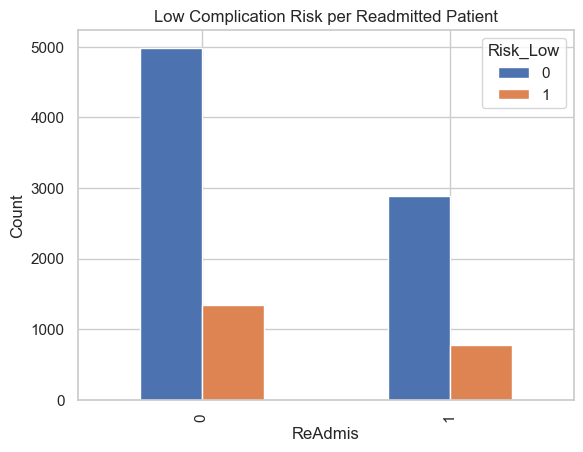

In [40]:
#Bar chart relationship for complication risk low
crosstab= pd.crosstab(index=mdf['ReAdmis'], columns=mdf['Risk_Low'])
crosstab.plot(kind='bar')
plt.ylabel('Count')
plt.title('Low Complication Risk per Readmitted Patient')
plt.show()

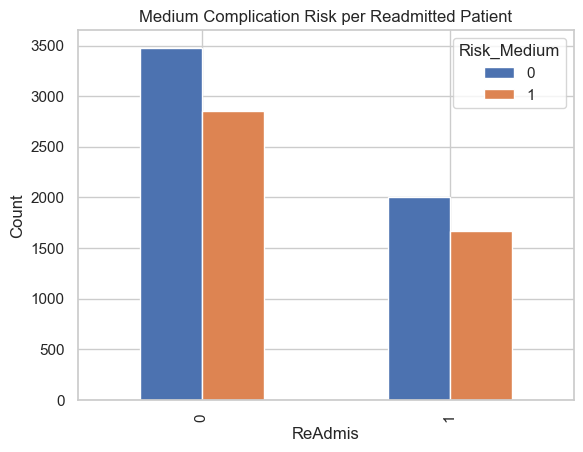

In [41]:
#Bar chart relationship for complication risk medium
crosstab= pd.crosstab(index=mdf['ReAdmis'], columns=mdf['Risk_Medium'])
crosstab.plot(kind='bar')
plt.ylabel('Count')
plt.title('Medium Complication Risk per Readmitted Patient')
plt.show()

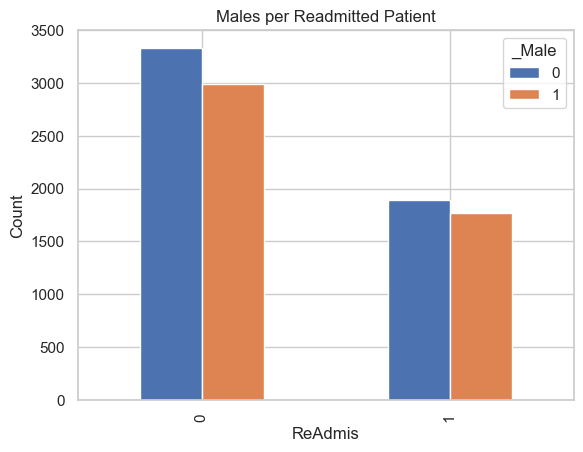

In [42]:
#Bar chart relationship for gender of male
crosstab= pd.crosstab(index=mdf['ReAdmis'], columns=mdf['_Male'])
crosstab.plot(kind='bar')
plt.ylabel('Count')
plt.title('Males per Readmitted Patient')
plt.show()

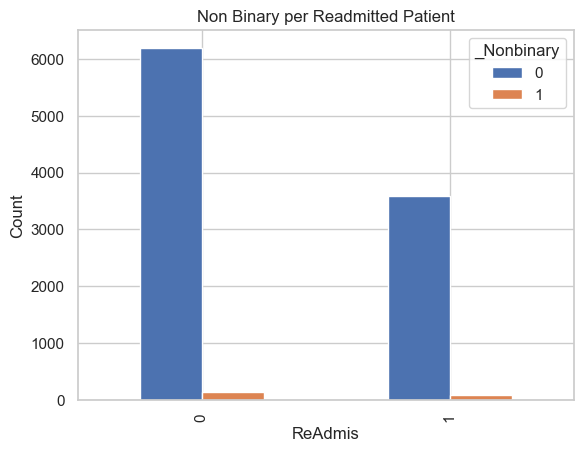

In [43]:
#Bar chart relationship for gender of non-binary
crosstab= pd.crosstab(index=mdf['ReAdmis'], columns=mdf['_Nonbinary'])
crosstab.plot(kind='bar')
plt.ylabel('Count')
plt.title('Non Binary per Readmitted Patient')
plt.show()

In [44]:
mdf.to_csv(r'/Users/robertpatton/Desktop/D208_task2_clean.csv')